In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

df = pd.read_excel('../dataset/covid.xlsx')

df.drop(['Patient ID', 'Parainfluenza 2'], inplace=True, axis=1)
df.head()
print(df.shape)
df = df[df.columns[df.isna().sum() / df.shape[0] < 0.9]]

df.dtypes.value_counts()
sns.heatmap(df.isna())


(5644, 109)


<AxesSubplot:>

In [2]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [3]:
for col in df.columns:
    val = df[col].isna().sum() / df.shape[0]
    if val < 50.0:
        print(col,'====>' , val)

Patient age quantile ====> 0.0
SARS-Cov-2 exam result ====> 0.0
Patient addmited to regular ward (1=yes, 0=no) ====> 0.0
Patient addmited to semi-intensive unit (1=yes, 0=no) ====> 0.0
Patient addmited to intensive care unit (1=yes, 0=no) ====> 0.0
Hematocrit ====> 0.893160878809355
Hemoglobin ====> 0.893160878809355
Platelets ====> 0.8933380581148122
Mean platelet volume  ====> 0.8938695960311835
Red blood Cells ====> 0.8933380581148122
Lymphocytes ====> 0.8933380581148122
Mean corpuscular hemoglobin concentration (MCHC) ====> 0.8933380581148122
Leukocytes ====> 0.8933380581148122
Basophils ====> 0.8933380581148122
Mean corpuscular hemoglobin (MCH) ====> 0.8933380581148122
Eosinophils ====> 0.8933380581148122
Mean corpuscular volume (MCV) ====> 0.8933380581148122
Monocytes ====> 0.8935152374202693
Red blood cell distribution width (RDW) ====> 0.8933380581148122
Respiratory Syncytial Virus ====> 0.760099220411056
Influenza A ====> 0.760099220411056
Influenza B ====> 0.760099220411056
P

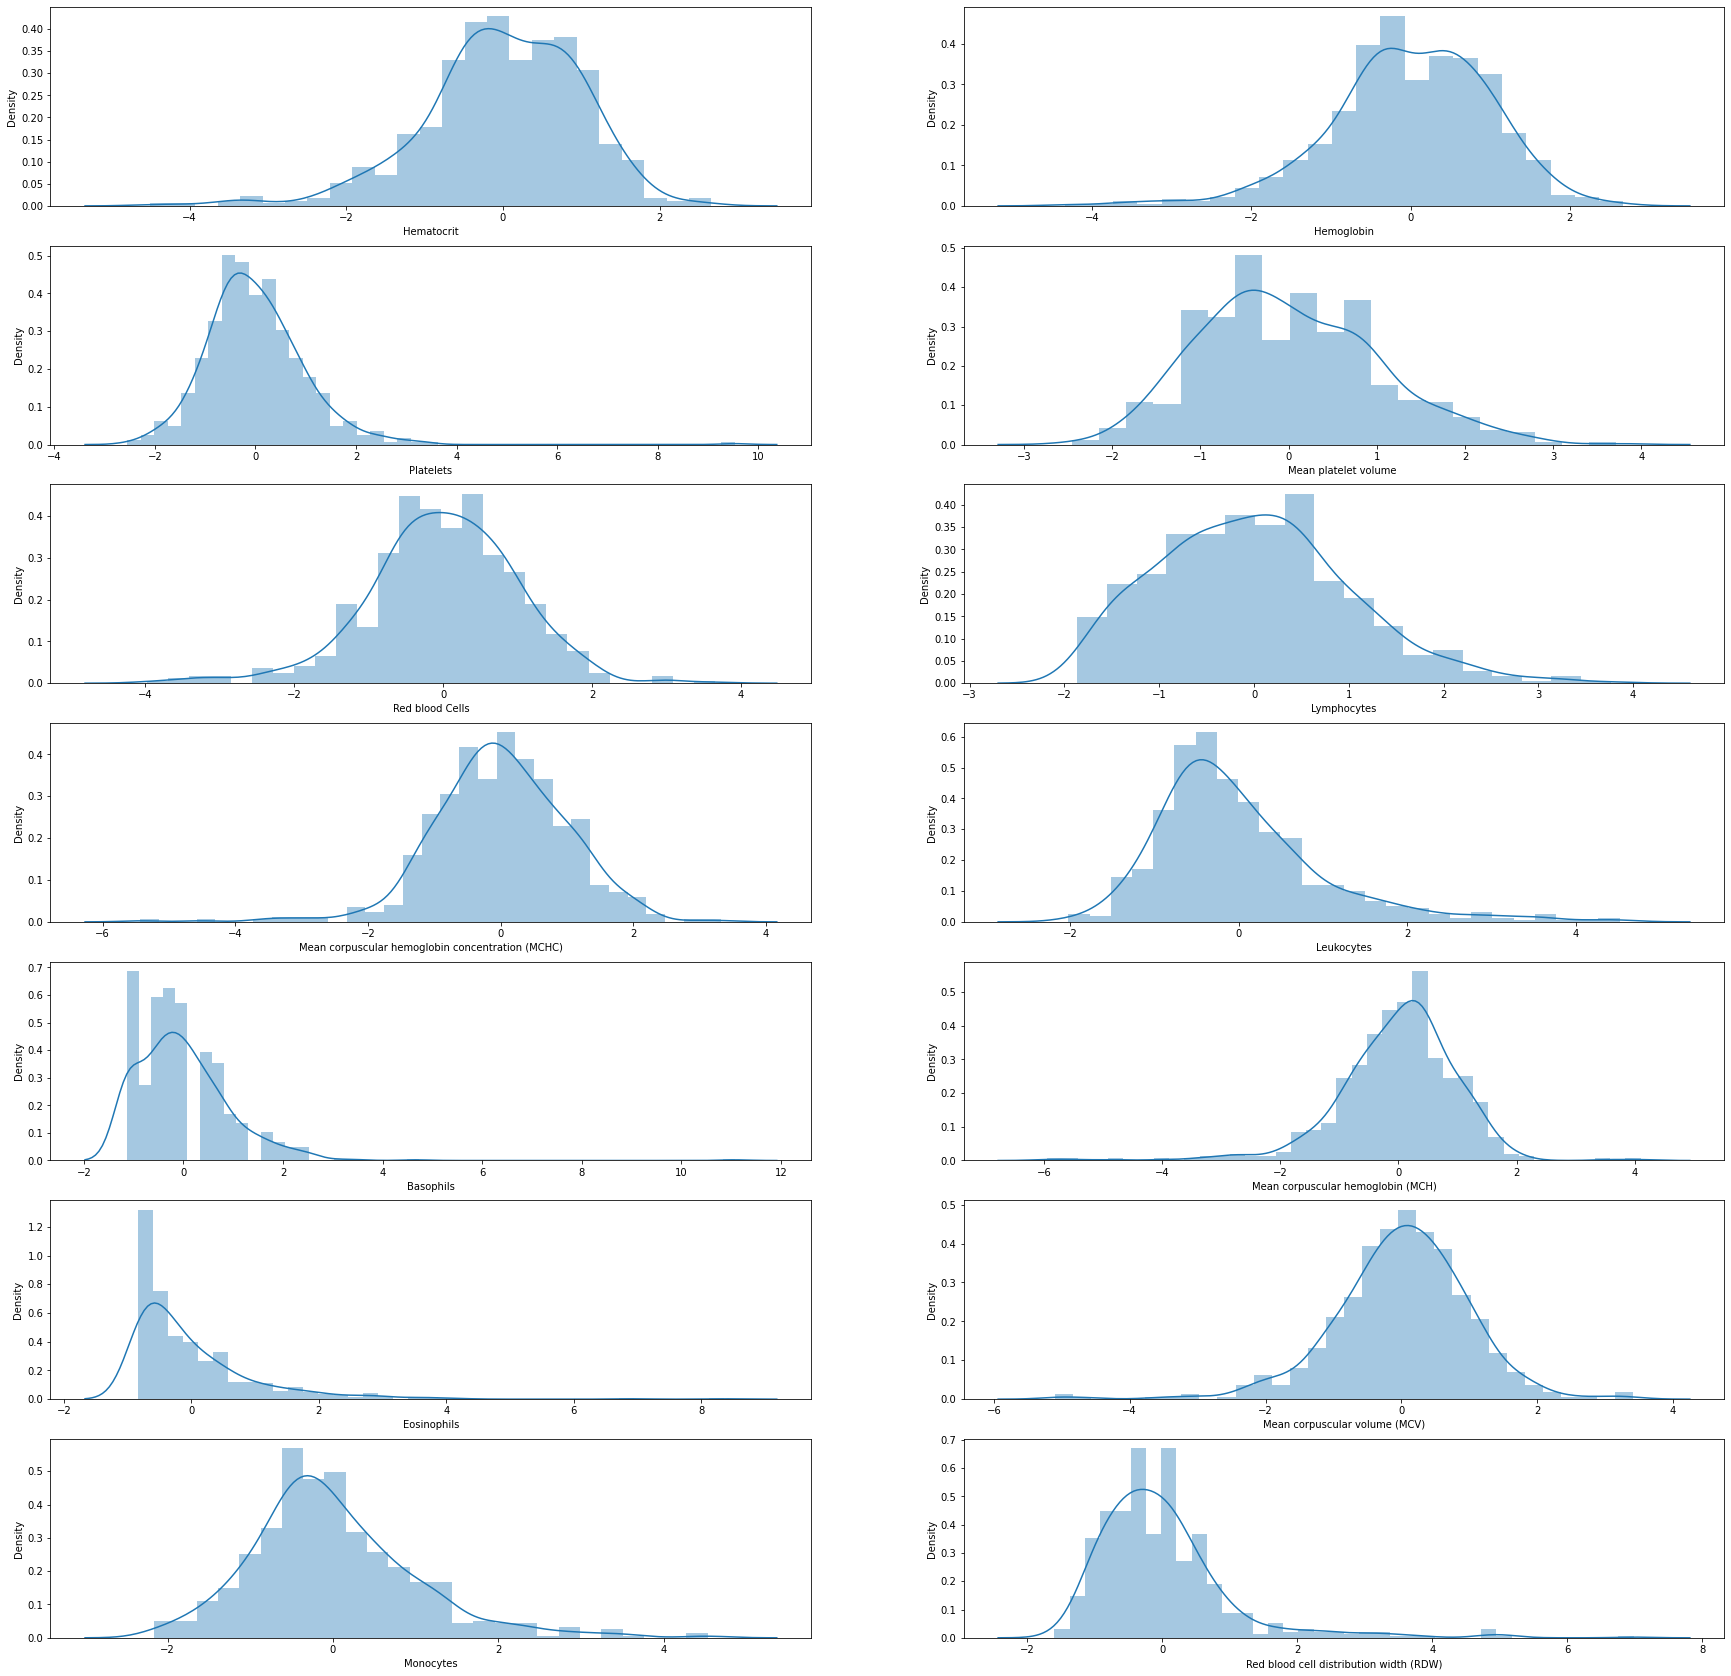

In [4]:
import warnings
warnings.filterwarnings('ignore')

def distributions(row, colum, data): 
    fig, ax = plt.subplots(nrows=row, ncols=colum, figsize=(30,30))
    col = data.columns
    index = 0
    for i in range(row):
        for j in range(colum):
            sns.distplot(data[col[index]], ax=ax[i][j])
            index += 1
    # plt.tight_layout() 

distributions(7,2,df.select_dtypes('float'))


SARS-Cov-2 exam result----------------------------['negative' 'positive']
Respiratory Syncytial Virus-----------------------[nan 'not_detected' 'detected']
Influenza A---------------------------------------[nan 'not_detected' 'detected']
Influenza B---------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------[nan 'not_detected' 'detected']
Adenovirus----------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------[nan 'not_detected' 'detected']
Coronavirus229E---------

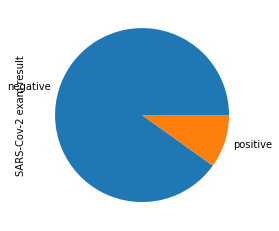

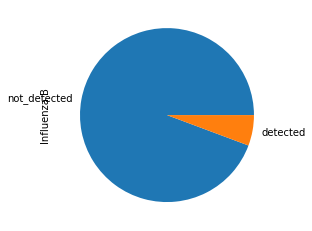

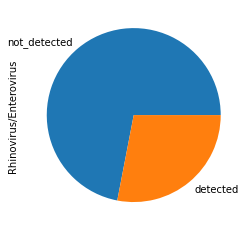

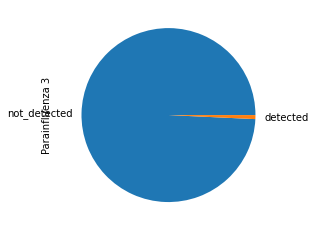

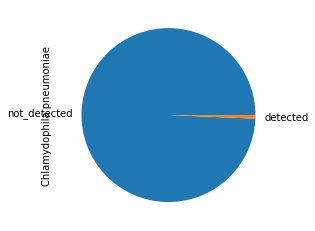

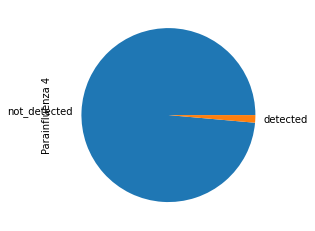

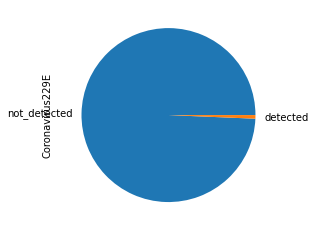

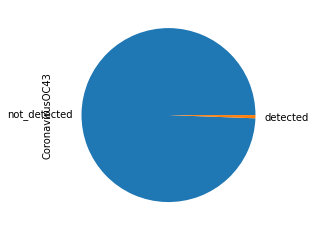

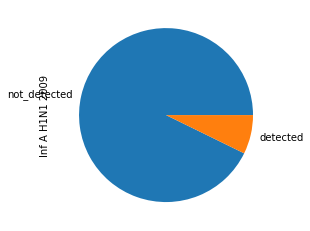

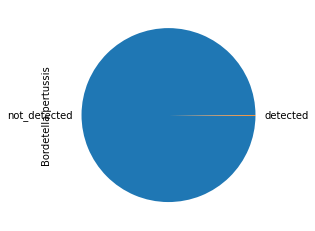

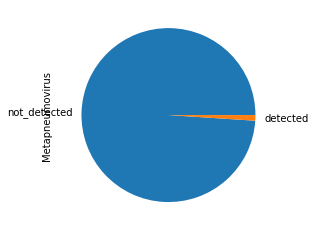

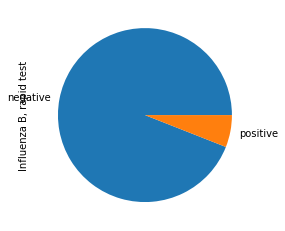

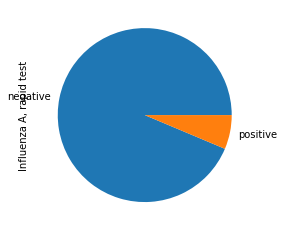

In [5]:
def category_count(dataset):
    for col in dataset.select_dtypes('object'):
        print(f'{col :-<50}{dataset[col].unique()}')

def category_pie(dataset):
    for col in dataset.select_dtypes('object'):
        plt.figure()
        dataset[col].value_counts().plot.pie()

category_count(df)
category_pie(df)

<AxesSubplot:>

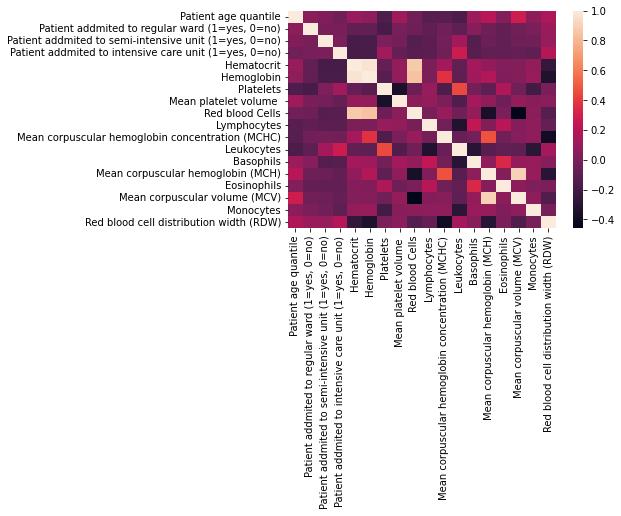

In [6]:
sns.heatmap(df.corr())

In [7]:
positive = df[df['SARS-Cov-2 exam result'] == 'positive']
negative = df[df['SARS-Cov-2 exam result'] == 'negative']

print('positive :', positive.shape[0],'negative :' ,negative.shape[0])
print('positive :', positive.shape[0] / df.shape[0],'negative :' ,negative.shape[0] / df.shape[0])

df['SARS-Cov-2 exam result'].value_counts()

positive : 558 negative : 5086
positive : 0.09886605244507442 negative : 0.9011339475549256


negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

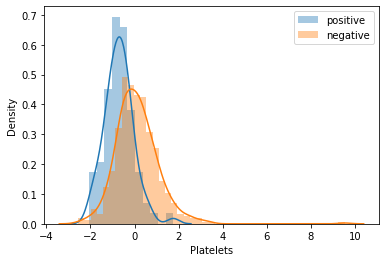

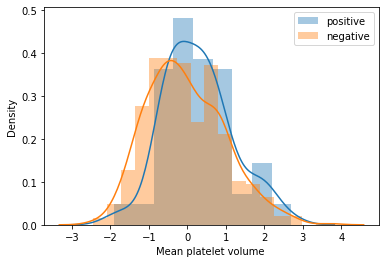

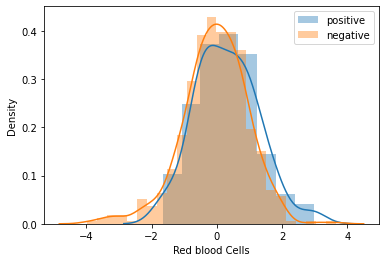

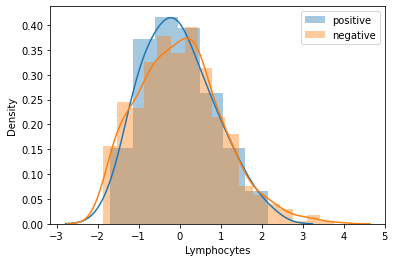

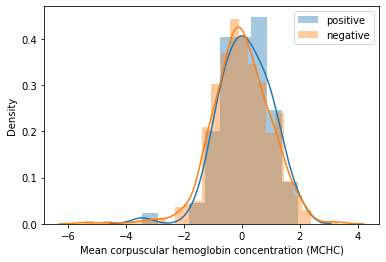

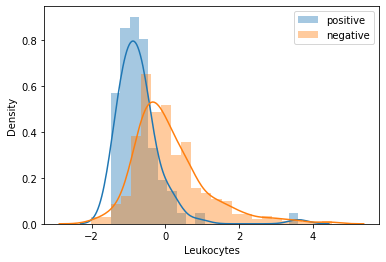

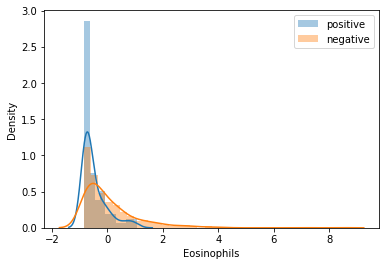

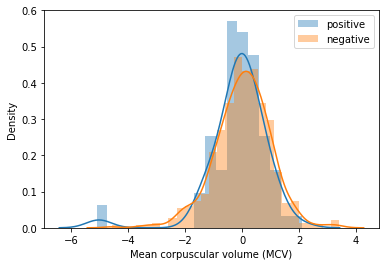

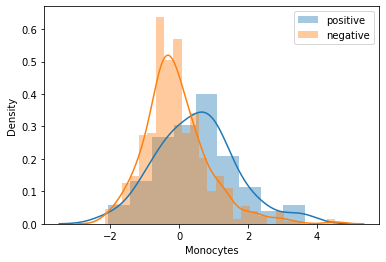

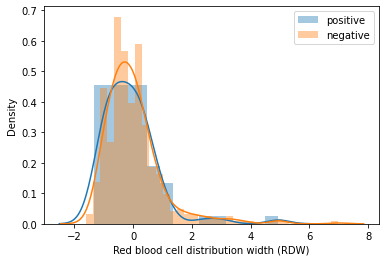

In [8]:
missing_val = df.isna().sum() / df.shape[0]

bloods = df.columns[missing_val > 0.86]
virals = df.columns[(missing_val < 0.88) & (missing_val > 0.75)]

for col in bloods:
    plt.figure()
    sns.distplot(positive[col], label='positive')
    sns.distplot(negative[col], label='negative')
    plt.legend()

	

In [9]:
(df.isna().sum() / df.shape[0]).sort_values()


Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Bordetella pertussis                                     0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainfluenza 3                                          0.760454
Coronavirus HKU1                                         0.760454
Rhinovirus

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

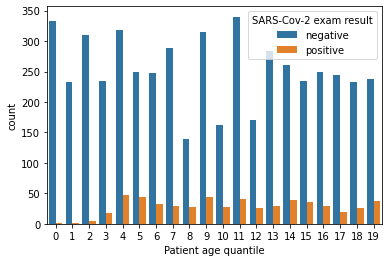

In [10]:
# plt.figure()
# sns.distplot(positive['Patient age quantile'], label='positive')
# sns.distplot(negative['Patient age quantile'], label='negative')
# plt.legend()

sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result',data=df)

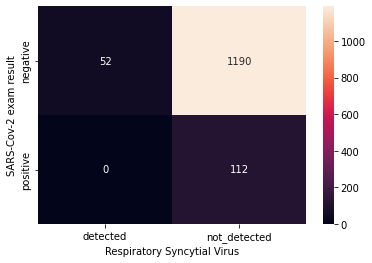

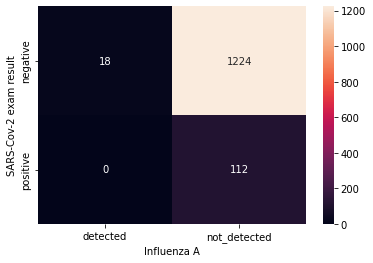

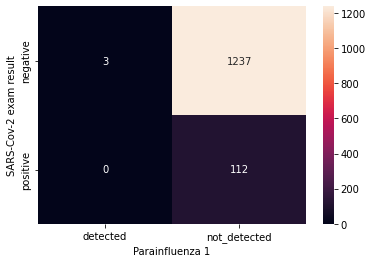

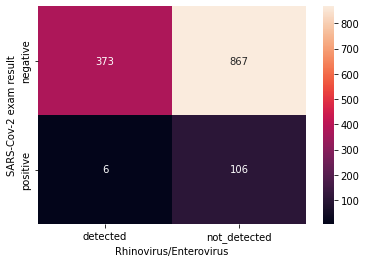

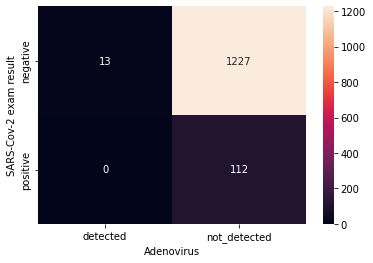

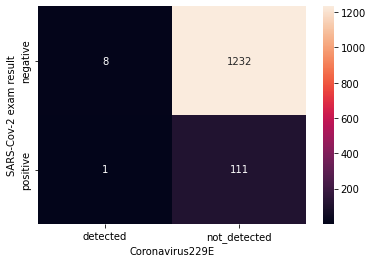

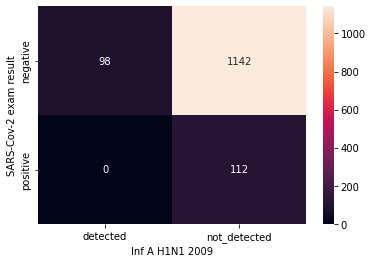

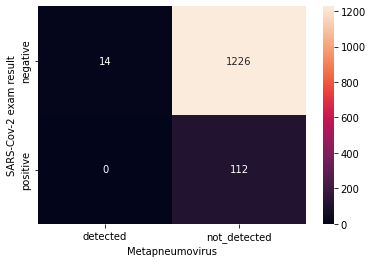

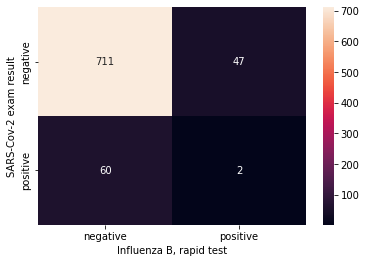

In [11]:
for col in virals:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')